In [3]:
import pandas as pd

In [4]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut,train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
#from sklearn.naive_bayes import 
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
# check xgboost version
import xgboost
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns

### a. Provide a table summarizing all the input variables and why they will be included or not included in  the modeling

In [5]:
import pandas as pd
from matplotlib import pyplot as plt

#load training data
df = pd.read_csv('CensusCanada2016Training.csv')
#df = pd.read_csv('/content/drive/My Drive/Colab Notebooks Datasets/ML Group Assignment 4/CensusCanada2016Training.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Total Population                                                           5000 non-null   int64  
 1   Total Households                                                           5000 non-null   int64  
 2   Median Household Income (Current Year $)                                   5000 non-null   float64
 3   Total Households For Period Of Construction                                5000 non-null   int64  
 4   Total Households For Period Of Construction Built Before 1961              5000 non-null   int64  
 5   Total Households For Period Of Construction Built Between 1961 And 1980    5000 non-null   int64  
 6   Total Households For Period Of Construction Built Betwee

In [6]:
cols = list(df.columns.values)
cols

['Total Population',
 'Total Households',
 'Median Household Income (Current Year $)',
 'Total Households For Period Of Construction',
 'Total Households For Period Of Construction Built Before 1961',
 'Total Households For Period Of Construction Built Between 1961 And 1980',
 'Total Households For Period Of Construction Built Between 1981 And 190',
 'Total Households For Period Of Construction Built Between 1991 And 2000',
 'Total Households For Period Of Construction Built Between 2001 And 2005',
 'Total Households For Structure Type Houses',
 'Total Households For Structure Type Apartment, Building Low And High Rise',
 'Total Households For Structure Type Other Dwelling Types',
 'Total Households for Tenure',
 'Dwellings by Tenure Owner',
 'Dwellings by Tenure Renter']

In [7]:
df = df[['Median Household Income (Current Year $)',
 'Total Population',
 'Total Households',
 'Total Households For Period Of Construction',
 'Total Households For Period Of Construction Built Before 1961',
 'Total Households For Period Of Construction Built Between 1961 And 1980',
 'Total Households For Period Of Construction Built Between 1981 And 190',
 'Total Households For Period Of Construction Built Between 1991 And 2000',
 'Total Households For Period Of Construction Built Between 2001 And 2005',
 'Total Households For Structure Type Houses',
 'Total Households For Structure Type Apartment, Building Low And High Rise',
 'Total Households For Structure Type Other Dwelling Types',
 'Total Households for Tenure',
 'Dwellings by Tenure Owner',
 'Dwellings by Tenure Renter']]

In [8]:
df.head()

,Median Household Income (Current Year $),Total Population,Total Households,Total Households For Period Of Construction,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Total Households for Tenure,Dwellings by Tenure Owner,Dwellings by Tenure Renter
0,68242.12,4051,1441,1441,323,199,53,182,526,911,525,5,1343,919,424
1,88172.37,2329,1026,1026,927,70,15,3,0,792,230,4,991,778,213
2,103853.38,5276,2071,2071,3,607,567,651,106,1418,652,1,1903,1522,381
3,82796.63,5967,2203,2203,133,1695,248,79,0,1397,806,0,2079,1272,807
4,91648.22,4236,1419,1419,0,7,127,938,143,914,505,0,1348,1186,162


In [9]:
df = pd.DataFrame(df)
df.columns = ['Median Household Income (Current Year $)',
 'Total Population',
 'Total Households',
 'Total Households For Period Of Construction',
 'Total Households For Period Of Construction Built Before 1961',
 'Total Households For Period Of Construction Built Between 1961 And 1980',
 'Total Households For Period Of Construction Built Between 1981 And 190',
 'Total Households For Period Of Construction Built Between 1991 And 2000',
 'Total Households For Period Of Construction Built Between 2001 And 2005',
 'Total Households For Structure Type Houses',
 'Total Households For Structure Type Apartment, Building Low And High Rise',
 'Total Households For Structure Type Other Dwelling Types',
 'Total Households for Tenure',
 'Dwellings by Tenure Owner',
 'Dwellings by Tenure Renter']

In [10]:
df.head()

,Median Household Income (Current Year $),Total Population,Total Households,Total Households For Period Of Construction,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Total Households for Tenure,Dwellings by Tenure Owner,Dwellings by Tenure Renter
0,68242.12,4051,1441,1441,323,199,53,182,526,911,525,5,1343,919,424
1,88172.37,2329,1026,1026,927,70,15,3,0,792,230,4,991,778,213
2,103853.38,5276,2071,2071,3,607,567,651,106,1418,652,1,1903,1522,381
3,82796.63,5967,2203,2203,133,1695,248,79,0,1397,806,0,2079,1272,807
4,91648.22,4236,1419,1419,0,7,127,938,143,914,505,0,1348,1186,162


### The following variables are included in the model


In [11]:
# df1 = df.drop(['Total Households','Total Households For Period Of Construction',
#                'Total Households For Period Of Construction Built Between 1981 And 190',
#                'Total Households For Structure Type Other Dwelling Types',
#                'Total Households for Tenure'], axis=1)

df1 = df.drop(['Total Households For Period Of Construction',
               'Total Households for Tenure'], axis=1)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Median Household Income (Current Year $)                                   5000 non-null   float64
 1   Total Population                                                           5000 non-null   int64  
 2   Total Households                                                           5000 non-null   int64  
 3   Total Households For Period Of Construction Built Before 1961              5000 non-null   int64  
 4   Total Households For Period Of Construction Built Between 1961 And 1980    5000 non-null   int64  
 5   Total Households For Period Of Construction Built Between 1981 And 190     5000 non-null   int64  
 6   Total Households For Period Of Construction Built Betwee

In [12]:
df1.columns

Index(['Median Household Income (Current Year $)', 'Total Population',
       'Total Households',
       'Total Households For Period Of Construction Built Before 1961',
       'Total Households For Period Of Construction Built Between 1961 And 1980',
       'Total Households For Period Of Construction Built Between 1981 And 190',
       'Total Households For Period Of Construction Built Between 1991 And 2000',
       'Total Households For Period Of Construction Built Between 2001 And 2005',
       'Total Households For Structure Type Houses',
       'Total Households For Structure Type Apartment, Building Low And High Rise',
       'Total Households For Structure Type Other Dwelling Types',
       'Dwellings by Tenure Owner', 'Dwellings by Tenure Renter'],
      dtype='object')

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = scaler.fit_transform(df1)

In [14]:
df1 = pd.DataFrame(df1)
df1.columns = ['Median Household Income (Current Year $)', 'Total Population',
       'Total Households',
       'Total Households For Period Of Construction Built Before 1961',
       'Total Households For Period Of Construction Built Between 1961 And 1980',
       'Total Households For Period Of Construction Built Between 1981 And 190',
       'Total Households For Period Of Construction Built Between 1991 And 2000',
       'Total Households For Period Of Construction Built Between 2001 And 2005',
       'Total Households For Structure Type Houses',
       'Total Households For Structure Type Apartment, Building Low And High Rise',
       'Total Households For Structure Type Other Dwelling Types',
       'Dwellings by Tenure Owner', 'Dwellings by Tenure Renter']

### b. As part of the above analysis provide a correlation matrix and present (selected) scatter plots

[[ 1.          0.17363496 -0.01822438 -0.29719936 -0.24402472  0.08042629
   0.19371539  0.23000169  0.43333449 -0.41605559  0.01654663  0.3670969
  -0.47620406]
 [ 0.17363496  1.          0.89843659 -0.0049287   0.25192172  0.35054756
   0.46292598  0.52451277  0.73694266  0.3063069   0.07013273  0.87069439
   0.30993173]
 [-0.01822438  0.89843659  1.          0.18601647  0.40068305  0.36473652
   0.41362927  0.43374571  0.5173581   0.61684282  0.08020278  0.74702519
   0.61286686]
 [-0.29719936 -0.0049287   0.18601647  1.          0.14914029 -0.22528808
  -0.28728769 -0.26845628 -0.16160579  0.35420754 -0.04824148 -0.12798994
   0.45847013]
 [-0.24402472  0.25192172  0.40068305  0.14914029  1.          0.22794774
  -0.12363661 -0.24173331  0.04374764  0.396384    0.02981167  0.10867538
   0.51005753]
 [ 0.08042629  0.35054756  0.36473652 -0.22528808  0.22794774  1.
   0.35143332 -0.01014161  0.23732381  0.18005379  0.0379465   0.34276037
   0.15592234]
 [ 0.19371539  0.46292598  0.41

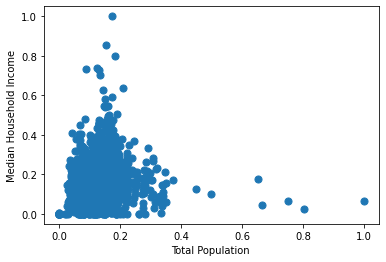

In [15]:
#correlation matrix
corr_matrix = df1.corr()
print(corr_matrix.values)


X = df1.values
#scatter plots
plt.scatter(X[:, 0], X[:, 1],  s=50, cmap='viridis')
plt.xlabel('Total Population ')
plt.ylabel('Median Household Income')
plt.show()

### c. A common problem in clustering is trying to decide how many clusters to include.

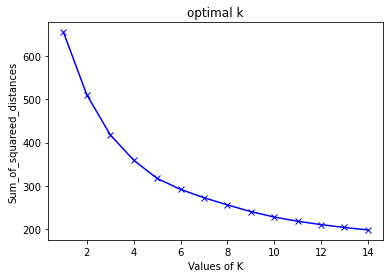

In [16]:
from sklearn.cluster import KMeans
Sum_of_squareed_distances = []
K = range(1,15)
for num_clusters in K:
    kmeans = KMeans(n_clusters = num_clusters)
    kmeans.fit(df1)
    Sum_of_squareed_distances.append(kmeans.inertia_)
    
plt.figure    
plt.plot(K,Sum_of_squareed_distances, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum_of_squareed_distances')   
plt.title('optimal k') 
plt.show()

K was selected as 2/3/4/5/6 from above figure


### d. Develop a detailed profile of these clusters using appropriate graphs and statistics, univariate and multivariate.

,index,k = 0,k = 1,k = 2,k = 3,k = 4
0,Median Household Income (Current Year $),0.150776,0.091726,0.098800,0.135955,0.115596
1,Total Population,0.249838,0.148787,0.184158,0.196273,0.086331
2,Total Households,0.173191,0.134608,0.154886,0.146339,0.067548
3,Total Households For Period Of Construction Bu...,0.037699,0.448952,0.147325,0.047540,0.097972
4,Total Households For Period Of Construction Bu...,0.057071,0.148542,0.325163,0.144961,0.097458
5,Total Households For Period Of Construction Bu...,0.101821,0.080755,0.175968,0.420207,0.069913
6,Total Households For Period Of Construction Bu...,0.241614,0.044185,0.087104,0.174637,0.046689
7,Total Households For Period Of Construction Bu...,0.232566,0.020540,0.040024,0.060572,0.023361
8,Total Households For Structure Type Houses,0.223534,0.095584,0.124450,0.173182,0.074232
9,"Total Households For Structure Type Apartment,...",0.039295,0.078017,0.080895,0.042676,0.022904


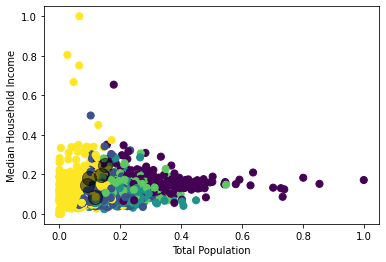

In [17]:
#train the model
n = 5
kmean = KMeans(n_clusters = n)
kmean.fit(df1)
y_kmeans_df1 = kmean.predict(df1)

#scatter plot
plt.scatter(df1['Total Population'], df1['Median Household Income (Current Year $)'], c=y_kmeans_df1, s=50, cmap='viridis')
plt.xlabel('Total Population')
plt.ylabel('Median Household Income')

centers = kmean.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

df_mean0  = df1[y_kmeans_df1 ==0].mean(axis = 0)
df_mean=pd.DataFrame({'index': df_mean0.index})

for i in range(n):
  df_mean['k = ' + str(i)] = df1[y_kmeans_df1 == i].mean(axis = 0).values

# database for mean of each cluster
# df_mean0  = df[y_kmeans_df1 ==0].mean(axis = 0)
# df_mean1  = df[y_kmeans_df1 ==1].mean(axis = 0)
# df_mean2  = df[y_kmeans_df1 ==2].mean(axis = 0)
# df_mean3  = df[y_kmeans_df1 ==3].mean(axis = 0)
# df_mean4  = df[y_kmeans_df1 ==4].mean(axis = 0)
# df_mean5  = df[y_kmeans_df1 ==5].mean(axis = 0)

# df_mean=pd.DataFrame({'index': df_mean0.index})

# df_mean['k=1']= df_mean0.values
# df_mean['k=2']= df_mean1.values
# df_mean['k=3']= df_mean2.values
# df_mean['k=4']= df_mean3.values
# df_mean['k=5']= df_mean4.values
# df_mean['k=6']= df_mean5.values
df_mean


In [18]:
df1['labels'] = y_kmeans_df1

In [19]:
df1.head()

,Median Household Income (Current Year $),Total Population,Total Households,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Dwellings by Tenure Owner,Dwellings by Tenure Renter,labels
0,0.101921,0.131573,0.093644,0.133969,0.056104,0.030460,0.077119,0.232538,0.099858,0.034431,0.003628,0.106514,0.062234,4
1,0.131687,0.075644,0.066675,0.384488,0.019735,0.008621,0.001271,0.000000,0.086814,0.015084,0.002903,0.090172,0.031264,1
2,0.155107,0.171360,0.134585,0.001244,0.171131,0.325862,0.275847,0.046861,0.155431,0.042760,0.000726,0.176402,0.055923,3
3,0.123658,0.193803,0.143164,0.055164,0.477869,0.142529,0.033475,0.000000,0.153129,0.052859,0.000000,0.147427,0.118450,2
4,0.136878,0.137582,0.092215,0.000000,0.001973,0.072989,0.397458,0.063218,0.100186,0.033119,0.000000,0.137459,0.023778,0


In [20]:
df1['labels'].value_counts()

4    1548
2    1056
1     965
3     725
0     706
Name: labels, dtype: int64

In [21]:
import seaborn as sns

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(20, 20))
sns.distplot(df['Median Household Income (Current Year $)'][df1['labels'] == 0], ax=axes[0, 0])
sns.distplot(df['Median Household Income (Current Year $)'][df1['labels'] == 1], ax=axes[0, 1])
sns.distplot(df['Median Household Income (Current Year $)'][df1['labels'] == 2], ax=axes[0, 2])
sns.distplot(df['Median Household Income (Current Year $)'][df1['labels'] == 3], ax=axes[0, 3])
sns.distplot(df['Median Household Income (Current Year $)'][df1['labels'] == 4], ax=axes[0, 4])
sns.distplot(df['Total Population'][df1['labels'] == 0], ax=axes[1, 0])
sns.distplot(df['Total Population'][df1['labels'] == 1], ax=axes[1, 1])
sns.distplot(df['Total Population'][df1['labels'] == 2], ax=axes[1, 2])
sns.distplot(df['Total Population'][df1['labels'] == 3], ax=axes[1, 3])
sns.distplot(df['Total Population'][df1['labels'] == 4], ax=axes[1, 4])
sns.distplot(df['Total Households For Structure Type Houses'][df1['labels'] == 0], ax=axes[2, 0])
sns.distplot(df['Total Households For Structure Type Houses'][df1['labels'] == 1], ax=axes[2, 1])
sns.distplot(df['Total Households For Structure Type Houses'][df1['labels'] == 2], ax=axes[2, 2])
sns.distplot(df['Total Households For Structure Type Houses'][df1['labels'] == 3], ax=axes[2, 3])
sns.distplot(df['Total Households For Structure Type Houses'][df1['labels'] == 4], ax=axes[2, 4])


In [23]:
df1_copy = df1.copy()
df1_copy = scaler.inverse_transform(df1_copy.drop(['labels'], axis = 1))

In [24]:
df1_copy = pd.DataFrame(df1_copy)
df1_copy.columns = ['Median Household Income (Current Year $)', 'Total Population',
       'Total Households',
       'Total Households For Period Of Construction Built Before 1961',
       'Total Households For Period Of Construction Built Between 1961 And 1980',
       'Total Households For Period Of Construction Built Between 1981 And 190',
       'Total Households For Period Of Construction Built Between 1991 And 2000',
       'Total Households For Period Of Construction Built Between 2001 And 2005',
       'Total Households For Structure Type Houses',
       'Total Households For Structure Type Apartment, Building Low And High Rise',
       'Total Households For Structure Type Other Dwelling Types',
       'Dwellings by Tenure Owner', 'Dwellings by Tenure Renter']
df1_copy['lables'] = df1['labels']

Text(0.5, 0, 'Median Household Income (Current Year $)')

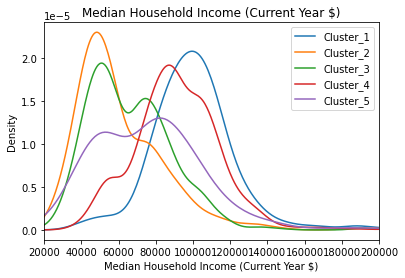

In [25]:
df1_copy.groupby('lables')['Median Household Income (Current Year $)'].plot(kind='kde')

#add legend
plt.legend(['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6'])
plt.xlim([20000, 200000])
# plt.xlim([0, 1])
plt.title('Median Household Income (Current Year $)')
#add x-axis label
plt.xlabel('Median Household Income (Current Year $)')

Text(0.5, 0, 'Total Households For Period Of Construction Built Between 1981 And 1900')

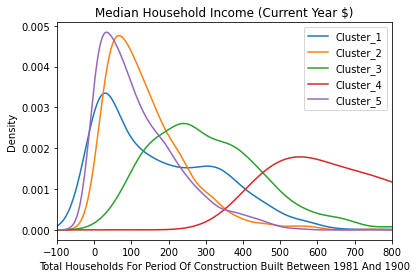

In [26]:
df1_copy.groupby('lables')['Total Households For Period Of Construction Built Between 1981 And 190'].plot(kind='kde')

#add legend
plt.legend(['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6'])
plt.title('Median Household Income (Current Year $)')

plt.xlim([-100, 800])
# plt.xlim([0, 1])

#add x-axis label
plt.xlabel('Total Households For Period Of Construction Built Between 1981 And 1900')




In [27]:
df_mean0  = df1_copy[df1_copy['lables'] == i].mean(axis = 0)
df_mean = pd.DataFrame({'index': df_mean0.index})

for i in range(n):
  df_mean['km = ' + str(i)] = df1_copy[df1_copy['lables'] == i].mean(axis = 0).values
  df_mean['kstd = ' + str(i)] = df1_copy[df1_copy['lables'] == i].std(axis = 0).values

df_mean


,index,km = 0,kstd = 0,km = 1,kstd = 1,km = 2,kstd = 2,km = 3,kstd = 3,km = 4,kstd = 4
0,Median Household Income (Current Year $),100953.840552,26703.580945,61415.723979,26745.830007,66152.265227,22265.609157,91030.005434,2.246832e+04,77398.079193,40837.838535
1,Total Population,7692.259207,3092.132503,4581.008290,1477.440726,5670.028409,1427.293125,6043.045517,1.732671e+03,2658.056202,1374.129506
2,Total Households,2665.065156,1239.316602,2071.347150,666.256342,2383.389205,693.802109,2251.868966,7.671850e+02,1039.425711,498.857471
3,Total Households For Period Of Construction Bu...,90.892351,148.929436,1082.422798,301.555627,355.199811,243.678502,114.619310,1.474052e+02,236.211240,210.538900
4,Total Households For Period Of Construction Bu...,202.432011,259.569013,526.879793,308.585523,1153.352273,361.269516,514.175172,3.275270e+02,345.682171,272.058902
5,Total Households For Period Of Construction Bu...,177.168555,158.499958,140.513990,105.837448,306.184659,156.956772,731.160000,2.586517e+02,121.649225,107.952432
6,Total Households For Period Of Construction Bu...,570.208215,391.623104,104.276684,91.266533,205.564394,150.393650,412.143448,2.543142e+02,110.185401,118.718567
7,Total Households For Period Of Construction Bu...,526.065156,339.581275,46.461140,58.745952,90.534091,105.426899,137.013793,1.319872e+02,52.843669,76.168256
8,Total Households For Structure Type Houses,2039.298867,990.321620,872.009326,609.898069,1135.359848,663.090939,1579.937931,6.742537e+02,677.215762,470.028080
9,"Total Households For Structure Type Apartment,...",599.174221,1112.855021,1189.604145,794.375672,1233.493371,983.514770,650.718621,8.402441e+02,349.235788,405.398390


In [32]:
df_b

,Median Household Income (Current Year $),Total Population,Total Households,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Dwellings by Tenure Owner,Dwellings by Tenure Renter
0,0.101921,0.131573,0.093644,0.133969,0.056104,0.030460,0.077119,0.232538,0.099858,0.034431,0.003628,0.106514,0.062234
1,0.131687,0.075644,0.066675,0.384488,0.019735,0.008621,0.001271,0.000000,0.086814,0.015084,0.002903,0.090172,0.031264
2,0.155107,0.171360,0.134585,0.001244,0.171131,0.325862,0.275847,0.046861,0.155431,0.042760,0.000726,0.176402,0.055923
3,0.123658,0.193803,0.143164,0.055164,0.477869,0.142529,0.033475,0.000000,0.153129,0.052859,0.000000,0.147427,0.118450
4,0.136878,0.137582,0.092215,0.000000,0.001973,0.072989,0.397458,0.063218,0.100186,0.033119,0.000000,0.137459,0.023778
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.162530,0.084056,0.061931,0.000000,0.000846,0.017816,0.212288,0.122016,0.101502,0.001771,0.000000,0.098169,0.004110
4996,0.102658,0.293481,0.250780,0.281211,0.277981,0.221839,0.152119,0.198055,0.261756,0.094176,0.025399,0.301576,0.153677
4997,0.106593,0.152295,0.123148,0.068022,0.136735,0.293678,0.221610,0.012821,0.074208,0.068075,0.130624,0.141284,0.079994
4998,0.087010,0.119296,0.067455,0.225633,0.052157,0.022989,0.040254,0.005747,0.087252,0.015871,0.000000,0.063282,0.050932


### e. Redo step c for a BIRCH clustering model using the same number of clusters as your k-means model

In [28]:
df_b = df1.drop(['labels'], axis = 1)

,index,k=0,k=1,k=2,k=3,k=4
0,Median Household Income (Current Year $),0.130997,0.072957,0.182296,0.775358,0.295894
1,Total Population,0.173141,0.136132,0.177728,0.076449,0.142720
2,Total Households,0.128843,0.123588,0.119291,0.053197,0.097445
3,Total Households For Period Of Construction Bu...,0.115797,0.234839,0.077018,0.089838,0.120599
4,Total Households For Period Of Construction Bu...,0.147737,0.188294,0.081437,0.030054,0.074487
5,Total Households For Period Of Construction Bu...,0.166096,0.126360,0.173430,0.028391,0.102688
6,Total Households For Period Of Construction Bu...,0.119367,0.068353,0.145072,0.040000,0.097439
7,Total Households For Period Of Construction Bu...,0.078570,0.030374,0.100879,0.056410,0.084790
8,Total Households For Structure Type Houses,0.158707,0.070062,0.179445,0.074296,0.135038
9,"Total Households For Structure Type Apartment,...",0.033825,0.081948,0.012479,0.009168,0.014979


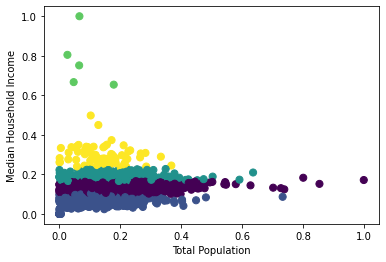

In [34]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import Birch

df_b2 = scaler.inverse_transform(df_b)

#a BIRCH clustering module 
brc = Birch(n_clusters = 5)
brc.fit(df_b2)

y_birch = brc.predict(df_b2)

#plot scatter plot
plt.scatter(df_b['Total Population'], df_b['Median Household Income (Current Year $)'], c=y_birch, s=50, cmap='viridis')
plt.xlabel('Total Population')
plt.ylabel('Median Household Income')

# df_mean0  = df1[y_kmeans_df1 ==0].mean(axis = 0)
# df_mean=pd.DataFrame({'index': df_mean0.index})

# for i in range(n):
#   df_mean['k = ' + str(i)] = df1[y_kmeans_df1 == i].mean(axis = 0).values


# database for mean of each cluster
df_mean0_  = df_b[y_birch ==0].mean(axis = 0)
df_mean1_  = df_b[y_birch ==1].mean(axis = 0)
df_mean2_  = df_b[y_birch ==2].mean(axis = 0)
df_mean3_  = df_b[y_birch ==3].mean(axis = 0)
df_mean4_  = df_b[y_birch ==4].mean(axis = 0)

df_mean2=pd.DataFrame({'index': df_mean0_.index})
df_mean2['k=0']= df_mean0_.values
df_mean2['k=1']= df_mean1_.values
df_mean2['k=2']= df_mean2_.values
df_mean2['k=3']= df_mean3_.values
df_mean2['k=4']= df_mean4_.values
df_mean2

In [ ]:
df.columns

Index(['Total Population', 'Total Households',
       'Median Household Income (Current Year $)',
       'Total Households For Period Of Construction',
       'Total Households For Period Of Construction Built Before 1961',
       'Total Households For Period Of Construction Built Between 1961 And 1980',
       'Total Households For Period Of Construction Built Between 1981 And 190',
       'Total Households For Period Of Construction Built Between 1991 And 2000',
       'Total Households For Period Of Construction Built Between 2001 And 2005',
       'Total Households For Structure Type Houses',
       'Total Households For Structure Type Apartment, Building Low And High Rise',
       'Total Households For Structure Type Other Dwelling Types',
       'Total Households for Tenure', 'Dwellings by Tenure Owner',
       'Dwellings by Tenure Renter'],
      dtype='object')

### f. Build your “best” clustering model, this time omitting the median income variable. Use this segmentation in the following.

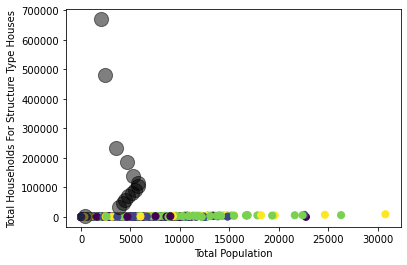

In [ ]:

# df1 = df.drop(['Total Households','Total Households For Period Of Construction',
#                'Total Households For Period Of Construction Built Between 1981 And 190',
#                'Total Households For Structure Type Other Dwelling Types',
#                'Median Household Income (Current Year $)',
#                'Total Households for Tenure'], axis=1)

df1 = df.drop(['Total Households','Total Households For Period Of Construction',
               'Total Households For Period Of Construction Built Between 1981 And 190',
               'Total Households For Structure Type Other Dwelling Types',
               'Total Households for Tenure'], axis=1)



kmean = KMeans(n_clusters = 4)
kmean.fit(df1)
y_kmeans = kmean.predict(df1)
plt.scatter(df1['Total Population'], df1['Total Households For Structure Type Houses'], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel('Total Population')
plt.ylabel('Total Households For Structure Type Houses')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)


# df_test = pd.read_csv('CensusCanada2016Test.csv')
df_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks Datasets/ML Group Assignment 4/CensusCanada2016Test.csv')

df_test = df_test.drop(['Total Households','Total Households For Period Of Construction',
               'Total Households For Period Of Construction Built Between 1981 And 190',
               'Total Households For Structure Type Other Dwelling Types',
               'Total Households for Tenure'], axis=1)

#build K means clustering model
kmean_t = KMeans(n_clusters = 6)
kmean_t.fit(df_test)
y_predct = kmean_t.predict(df_test)


#save the prediced result as text file    
lines = []

for pred in y_predct:
    lines.append(str(pred))

with open('Teampredictions.txt', 'w') as f:
    f.write('\n'.join(lines))    

In [ ]:
df1['labels'] = y_kmeans

In [ ]:
df2_X = df.drop(['Median Household Income (Current Year $)', 'Total Households For Period Of Construction', 'Total Households for Tenure'], axis = 1)

In [ ]:
df2_X.head(1)

,Total Population,Total Households,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Dwellings by Tenure Owner,Dwellings by Tenure Renter
0,4051,1441,323,199,53,182,526,911,525,5,919,424


In [ ]:
df2_y = df['Median Household Income (Current Year $)']

In [ ]:
df2_y.head(1)

0    68242.12
Name: Median Household Income (Current Year $), dtype: float64

In [ ]:
# Scaling X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2_X = scaler.fit_transform(df2_X)

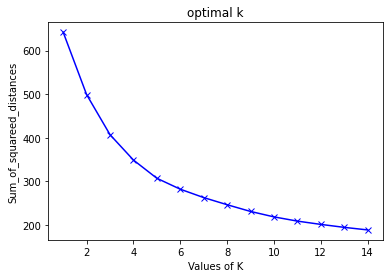

In [ ]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
from sklearn.cluster import KMeans
Sum_of_squareed_distances = []
K = range(1,15)
for num_clusters in K:
    kmeans = KMeans(n_clusters = num_clusters)
    kmeans.fit(df2_X)
    # pred_k = kmeans.predict(df2_X)
    # kmeans_sil = silhouette_score(df2_X, pred_k, metric='euclidean')
    Sum_of_squareed_distances.append(kmeans.inertia_)
    
plt.figure    
plt.plot(K,Sum_of_squareed_distances, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum_of_squareed_distances')   
plt.title('optimal k') 
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(df2_X)
y_kmeans_df2 = kmeans.predict(df2_X)

In [ ]:
l1 = []
l2 = []
l3 = []
l4 = []

for i in (3,4,5,6):
  kmean = KMeans(i,random_state=42)
  mod_k = kmean.fit(df2_X)
  pred_k1 = mod_k.predict(df2_X)
  kmean_sil = silhouette_score(df2_X,pred_k1,metric='euclidean')
  kmean_cal = calinski_harabasz_score(df2_X,pred_k1)
  kmean_dav = davies_bouldin_score(df2_X,pred_k1)
  print(i,'\t','Silhouette Score:' ,kmean_sil,',Calinski Harbasz Score: ',kmean_cal,',Davies Bouldin Score: ',kmean_dav)
  l1.append(kmean_sil)
  l2.append(kmean_cal)
  l3.append(kmean_dav)
  l4.append(i)

3 	 Silhouette Score: 0.2244866916138268 ,Calinski Harbasz Score:  1445.3612272896532 ,Davies Bouldin Score:  1.4727983519044585
4 	 Silhouette Score: 0.24088414022366625 ,Calinski Harbasz Score:  1402.4224739969616 ,Davies Bouldin Score:  1.4205819830036883
5 	 Silhouette Score: 0.24370069385047163 ,Calinski Harbasz Score:  1365.4681976698832 ,Davies Bouldin Score:  1.346701335851608
6 	 Silhouette Score: 0.22964932521880305 ,Calinski Harbasz Score:  1278.4557022960944 ,Davies Bouldin Score:  1.3118544128083804


In [ ]:
pd.DataFrame({'Cluster_number':l4,'Silhoutte Score':l1,'Calinski Harabasz Index':l2,'Davies Bouldin Score':l3})

,Cluster_number,Silhoutte Score,Calinski Harabasz Index,Davies Bouldin Score
0,3,0.224487,1445.361227,1.472798
1,4,0.240884,1402.422474,1.420582
2,5,0.243701,1365.468198,1.346701
3,6,0.229649,1278.455702,1.311854


In [ ]:
df.columns

Index(['Total Population', 'Total Households',
       'Median Household Income (Current Year $)',
       'Total Households For Period Of Construction',
       'Total Households For Period Of Construction Built Before 1961',
       'Total Households For Period Of Construction Built Between 1961 And 1980',
       'Total Households For Period Of Construction Built Between 1981 And 190',
       'Total Households For Period Of Construction Built Between 1991 And 2000',
       'Total Households For Period Of Construction Built Between 2001 And 2005',
       'Total Households For Structure Type Houses',
       'Total Households For Structure Type Apartment, Building Low And High Rise',
       'Total Households For Structure Type Other Dwelling Types',
       'Total Households for Tenure', 'Dwellings by Tenure Owner',
       'Dwellings by Tenure Renter'],
      dtype='object')

In [ ]:
df2_X = pd.DataFrame(df2_X)
df2_X.columns = ['Total Population', 'Total Households',
       'Total Households For Period Of Construction Built Before 1961',
       'Total Households For Period Of Construction Built Between 1961 And 1980',
       'Total Households For Period Of Construction Built Between 1981 And 190',
       'Total Households For Period Of Construction Built Between 1991 And 2000',
       'Total Households For Period Of Construction Built Between 2001 And 2005',
       'Total Households For Structure Type Houses',
       'Total Households For Structure Type Apartment, Building Low And High Rise',
       'Total Households For Structure Type Other Dwelling Types',
        'Dwellings by Tenure Owner',
       'Dwellings by Tenure Renter']

In [ ]:
df2_X['labels'] = y_kmeans_df2

In [ ]:
df2_X.head()

,Total Population,Total Households,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Dwellings by Tenure Owner,Dwellings by Tenure Renter,labels
0,0.131573,0.093644,0.133969,0.056104,0.030460,0.077119,0.232538,0.099858,0.034431,0.003628,0.106514,0.062234,1
1,0.075644,0.066675,0.384488,0.019735,0.008621,0.001271,0.000000,0.086814,0.015084,0.002903,0.090172,0.031264,2
2,0.171360,0.134585,0.001244,0.171131,0.325862,0.275847,0.046861,0.155431,0.042760,0.000726,0.176402,0.055923,3
3,0.193803,0.143164,0.055164,0.477869,0.142529,0.033475,0.000000,0.153129,0.052859,0.000000,0.147427,0.118450,0
4,0.137582,0.092215,0.000000,0.001973,0.072989,0.397458,0.063218,0.100186,0.033119,0.000000,0.137459,0.023778,4


In [ ]:
df2_X['labels'].value_counts()

1    1540
0    1061
2     971
3     714
4     714
Name: labels, dtype: int64

In [ ]:
df2_X_cluster0 = df2_X[df2_X['labels'] == 0]
df2_X_cluster1 = df2_X[df2_X['labels'] == 1]
df2_X_cluster2 = df2_X[df2_X['labels'] == 2]
df2_X_cluster3 = df2_X[df2_X['labels'] == 3]
df2_X_cluster4 = df2_X[df2_X['labels'] == 4]

In [ ]:
df2_y_cluster0 = df2_y[y_kmeans_df2 == 0]
df2_y_cluster1 = df2_y[y_kmeans_df2 == 1]
df2_y_cluster2 = df2_y[y_kmeans_df2 == 2]
df2_y_cluster3 = df2_y[y_kmeans_df2 == 3]
df2_y_cluster4 = df2_y[y_kmeans_df2 == 4]

### BRING ME HERE!!

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df2_X_cluster4.drop(['labels'], axis = 1), df2_y_cluster4, test_size=0.2, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(571, 12) (571,)
(143, 12) (143,)


In [ ]:
X_train

,Total Population,Total Households,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Dwellings by Tenure Owner,Dwellings by Tenure Renter
4654,0.243529,0.178386,0.023227,0.371864,0.135632,0.306356,0.119363,0.298805,0.001246,0.000000,0.270978,0.032585
3183,0.150801,0.085651,0.000000,0.000000,0.000000,0.121186,0.216622,0.144470,0.000000,0.000000,0.138618,0.003963
728,0.313196,0.265077,0.014932,0.027911,0.443103,0.406356,0.354996,0.176477,0.161923,0.000000,0.380274,0.094085
479,0.369288,0.240122,0.013273,0.008176,0.113793,0.041102,0.219275,0.371479,0.019871,0.002177,0.343880,0.068986
1506,0.186690,0.134715,0.087516,0.091909,0.181034,0.171186,0.104332,0.217911,0.004919,0.007257,0.211984,0.019228
...,...,...,...,...,...,...,...,...,...,...,...,...
883,0.328786,0.275149,0.054749,0.102058,0.205172,0.394068,0.171530,0.209909,0.152020,0.000726,0.226820,0.298547
4492,0.192666,0.144268,0.009954,0.032704,0.254023,0.377542,0.218391,0.177025,0.039677,0.000000,0.179879,0.079260
431,0.156582,0.106642,0.023642,0.122921,0.151724,0.242373,0.122458,0.163872,0.009050,0.005806,0.157510,0.030677
1526,0.195167,0.107681,0.004148,0.000000,0.000000,0.147458,0.322281,0.179875,0.001049,0.000000,0.165276,0.012036


In [ ]:
X_test

,Total Population,Total Households,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Dwellings by Tenure Owner,Dwellings by Tenure Renter
3892,0.150963,0.112815,0.000000,0.000000,0.128736,0.484322,0.133952,0.155870,0.020593,0.000000,0.194019,0.001468
1429,0.343564,0.189953,0.061385,0.034113,0.032759,0.031356,0.069850,0.289378,0.018560,0.000000,0.247682,0.073242
2853,0.190555,0.109891,0.000000,0.000564,0.000000,0.019915,0.477896,0.179985,0.003017,0.002177,0.157279,0.028328
50,0.332229,0.162334,0.000000,0.019453,0.217816,0.103814,0.566755,0.226241,0.028463,0.000000,0.204103,0.083223
2787,0.144500,0.107161,0.000000,0.004229,0.266092,0.280932,0.135721,0.174175,0.003935,0.000000,0.160292,0.023191
...,...,...,...,...,...,...,...,...,...,...,...,...
3245,0.259573,0.239862,0.056408,0.094164,0.229885,0.272034,0.241821,0.121890,0.169071,0.000726,0.143255,0.315426
160,0.494138,0.375032,0.025301,0.137299,0.077586,0.265678,0.192750,0.559027,0.043088,0.010160,0.524919,0.093645
1199,0.247426,0.204315,0.071340,0.223851,0.198851,0.618644,0.105217,0.288282,0.033250,0.005080,0.306908,0.059445
4386,0.138361,0.087276,0.036085,0.036369,0.100575,0.283051,0.087975,0.123424,0.014035,0.002177,0.127028,0.024365


### Previous Attempt

In [ ]:
df2 = df1.drop(['Median Household Income (Current Year $)', 'labels'], axis = 1)

KeyboardInterrupt: ignored

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt: 


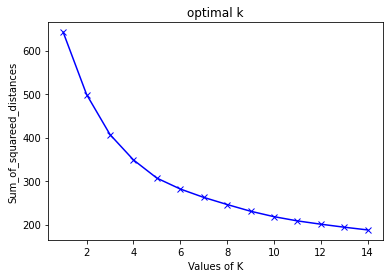

In [ ]:
from sklearn.cluster import KMeans
Sum_of_squareed_distances = []
K = range(1,15)
for num_clusters in K:
    kmeans = KMeans(n_clusters = num_clusters)
    kmeans.fit(df2)
    Sum_of_squareed_distances.append(kmeans.inertia_)
    
plt.figure    
plt.plot(K,Sum_of_squareed_distances, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum_of_squareed_distances')   
plt.title('optimal k') 
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df2)
y_kmeans_df2 = kmeans.predict(df2)

In [ ]:
y_kmeans_df2

array([1, 2, 0, ..., 0, 1, 0], dtype=int32)

In [ ]:
df2['labels'] = y_kmeans_df2

In [ ]:
df2.head()

,Total Population,Total Households,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Dwellings by Tenure Owner,Dwellings by Tenure Renter,labels
0,0.131573,0.093644,0.133969,0.056104,0.030460,0.077119,0.232538,0.099858,0.034431,0.003628,0.106514,0.062234,1
1,0.075644,0.066675,0.384488,0.019735,0.008621,0.001271,0.000000,0.086814,0.015084,0.002903,0.090172,0.031264,2
2,0.171360,0.134585,0.001244,0.171131,0.325862,0.275847,0.046861,0.155431,0.042760,0.000726,0.176402,0.055923,0
3,0.193803,0.143164,0.055164,0.477869,0.142529,0.033475,0.000000,0.153129,0.052859,0.000000,0.147427,0.118450,0
4,0.137582,0.092215,0.000000,0.001973,0.072989,0.397458,0.063218,0.100186,0.033119,0.000000,0.137459,0.023778,3


In [ ]:
df2['labels'].value_counts()

1    1851
0    1273
2    1159
3     717
Name: labels, dtype: int64

In [ ]:
df2_cluster1 = df2[df2['labels'] == 1]
df2_cluster1.head()

,Total Population,Total Households,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Dwellings by Tenure Owner,Dwellings by Tenure Renter,labels
0,0.131573,0.093644,0.133969,0.056104,0.030460,0.077119,0.232538,0.099858,0.034431,0.003628,0.106514,0.062234,1
5,0.127935,0.086366,0.295313,0.034113,0.048276,0.058898,0.022104,0.121561,0.014100,0.003628,0.115554,0.034199,1
7,0.130956,0.100078,0.175446,0.102904,0.191954,0.117373,0.030062,0.145347,0.013641,0.004354,0.133866,0.038896,1
14,0.143818,0.124838,0.197428,0.210882,0.159770,0.118220,0.025199,0.156199,0.032135,0.004354,0.143139,0.091149,1
15,0.053818,0.055433,0.197428,0.040880,0.057471,0.018220,0.011494,0.000000,0.055942,0.000000,0.024223,0.086452,1


In [ ]:
y_cluster1 = df1[y_kmeans_df2 == 1]['Median Household Income (Current Year $)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df2_cluster1, y_cluster1, test_size=0.2, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1480, 13) (1480,)
(371, 13) (371,)


In [ ]:
# from sklearn.preprocessing import StandardScaler,MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

In [ ]:
# lr = LinearRegression()
# xg = xgboost.XGBRegressor(n_estimators=250, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor
# dtr = DecisionTreeRegressor(random_state=0) #90
# rfr = RandomForestRegressor(max_depth=100, random_state=0)
# model = lm.fit(X_train, y_train)
# predictions = lm.predict(X_test)

In [ ]:
# y_test

In [ ]:
# import numpy as np
# y_test = np.reshape(y_test, (-1, 2))

In [ ]:
y_test

1305    0.086845
2934    0.205010
3196    0.156843
2900    0.125528
1050    0.123513
          ...   
1494    0.083554
1718    0.135885
2989    0.129438
2947    0.155526
119     0.126660
Name: Median Household Income (Current Year $), Length: 371, dtype: float64

In [ ]:
y_test = scaler.inverse_transform(y_test)

ValueError: ignored

### Modelling

In [ ]:
from sklearn.metrics import mean_squared_error,explained_variance_score,r2_score,mean_absolute_percentage_error,mean_absolute_error
model_names = []
explained_variances = []
r2_scores= []
mean_absolute_percentage_errors= []
mean_absolute_errors=[]
cv_10_neg_mean_absolute_error= []

In [ ]:
def test_maes(model,X_train,y_train,X_test,y_test,model_name):
    
    model = model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    explained_variance= explained_variance_score(y_test, predictions)
    r2_scor= r2_score(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)
    mae= mean_absolute_error(y_test, predictions)

    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error',
                             cv=cv, n_jobs=-1)

    cv10_mae = scores.mean()*-1
    return model,model_name,explained_variance,r2_scor,mape,mae,cv10_mae,predictions

In [ ]:
lm = LinearRegression()
lm,model_name,explained_variance,r2_scor,mape,mae,cv10_mae,predictions = test_maes(lm,X_train,y_train,X_test,y_test,model_name= 'Linear_Regression')

In [ ]:
model_names.append(model_name)
explained_variances.append(explained_variance)
mean_absolute_percentage_errors.append(mape)
mean_absolute_errors.append(mae)
r2_scores.append(r2_scor)
cv_10_neg_mean_absolute_error.append(cv10_mae)

In [ ]:
import xgboost
xg= xgboost.XGBRegressor(n_estimators=300, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xg,model_name,explained_variance,r2_scor,mape,mae,cv10_mae,predictions = test_maes(xg,X_train,y_train,X_test,y_test,model_name= 'XGBoostReg')

[01:43:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
model_names.append(model_name)
explained_variances.append(explained_variance)
mean_absolute_percentage_errors.append(mape)
mean_absolute_errors.append(mae)
r2_scores.append(r2_scor)
cv_10_neg_mean_absolute_error.append(cv10_mae)

In [ ]:
DecisionTreeRegressors = DecisionTreeRegressor(random_state = 0)
DecisionTreeRegressors,model_name,explained_variance,r2_scor,mape,mae,cv10_mae,predictions = test_maes(DecisionTreeRegressors,X_train,y_train,X_test,y_test,model_name= 'DecisionTreeRegressor')

In [ ]:
model_names.append(model_name)
explained_variances.append(explained_variance)
mean_absolute_percentage_errors.append(mape)
mean_absolute_errors.append(mae)
r2_scores.append(r2_scor)
cv_10_neg_mean_absolute_error.append(cv10_mae)

In [ ]:
RandomForestRegressors= RandomForestRegressor(n_estimators=40)
RandomForestRegressors,model_name,explained_variance,r2_scor,mape,mae,cv10_mae,predictions = test_maes(RandomForestRegressors,X_train,y_train,X_test,y_test,model_name= 'RandomForestRegressor')

In [ ]:
model_names.append(model_name)
explained_variances.append(explained_variance)
mean_absolute_percentage_errors.append(mape)
mean_absolute_errors.append(mae)
r2_scores.append(r2_scor)
cv_10_neg_mean_absolute_error.append(cv10_mae)

In [ ]:
# from sklearn.svm import SVR
# svr_rbf = SVR(kernel="rbf", C=50, gamma=0.1, epsilon=0.1)
# svr_lin = SVR(kernel="linear", C=50, gamma="auto")
# svr_poly = SVR(kernel="poly", C=50, gamma="auto", degree=3, epsilon=0.1, coef0=1)
# svr_rbf,model_name,explained_variance,r2_scor,mape,mae,cv10_mae,predictions = test_maes(svr_rbf,X_train,y_train,X_test,y_test,model_name= 'svr_rbf')

In [ ]:
# model_names.append(model_name)
# explained_variances.append(explained_variance)
# mean_absolute_percentage_errors.append(mape)
# mean_absolute_errors.append(mae)
# r2_scores.append(r2_scor)
# cv_10_neg_mean_absolute_error.append(cv10_mae)

In [ ]:
# svr_lin,model_name,explained_variance,r2_scor,mape,mae,cv10_mae,predictions = test_maes(svr_lin,X_train,y_train,X_test,y_test,model_name= 'svr_lin')

In [ ]:
# model_names.append(model_name)
# explained_variances.append(explained_variance)
# mean_absolute_percentage_errors.append(mape)
# mean_absolute_errors.append(mae)
# r2_scores.append(r2_scor)
# cv_10_neg_mean_absolute_error.append(cv10_mae)

In [ ]:
# svr_poly,model_name,explained_variance,r2_scor,mape,mae,cv10_mae,predictions = test_maes(svr_poly,X_train,y_train,X_test,y_test,model_name= 'svr_poly')

In [ ]:
# model_names.append(model_name)
# explained_variances.append(explained_variance)
# mean_absolute_percentage_errors.append(mape)
# mean_absolute_errors.append(mae)
# r2_scores.append(r2_scor)
# cv_10_neg_mean_absolute_error.append(cv10_mae)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knr = KNeighborsRegressor()
knr,model_name,explained_variance,r2_scor,mape,mae,cv10_mae,predictions = test_maes(knr,X_train,y_train,X_test,y_test,model_name= 'knr')

In [ ]:
model_names.append(model_name)
explained_variances.append(explained_variance)
mean_absolute_percentage_errors.append(mape)
mean_absolute_errors.append(mae)
r2_scores.append(r2_scor)
cv_10_neg_mean_absolute_error.append(cv10_mae)

In [ ]:
model_names

['Linear_Regression',
 'XGBoostReg',
 'DecisionTreeRegressor',
 'RandomForestRegressor',
 'knr']

In [ ]:
explained_variances

[0.23977757379966713,
 0.045010783765269013,
 -0.37840373554129436,
 -0.06408296268058034,
 -0.12065748982245084]

In [ ]:
mean_absolute_percentage_errors

[0.1533009033976828,
 0.1512231216207453,
 0.19783516081601682,
 0.14938119883967602,
 0.1775452017048557]

In [ ]:
mean_absolute_errors

[14689.726489342247,
 15272.578288898601,
 19617.77979020979,
 15044.697333916087,
 17333.39064335664]

In [ ]:
r2_scores

[0.23800452720910492,
 0.04501050499324988,
 -0.3827645530565482,
 -0.06408370236669536,
 -0.1283584125467485]

In [ ]:
cv_10_neg_mean_absolute_error

[15711.85922570996,
 14403.887716145833,
 18793.100095238093,
 14823.900451785714,
 14803.61662095238]

In [ ]:
# df_metrics = pd.DataFrame({'model_names':model_names, 'exp_var':explained_variances, 'mape':mean_absolute_percentage_errors, 'mae':mean_absolute_errors, 'r2':r2_scores, 'cv10':cv_10_neg_mean_absolute_error})
df_metrics = pd.DataFrame({'model_names':model_names,'MAE':mean_absolute_errors})

In [ ]:
df_metrics_melt = pd.melt(df_metrics, id_vars="model_names", var_name="metrics", value_name="metric_value")
df_metrics_melt.head()

,model_names,metrics,metric_value
0,Linear_Regression,MAE,14689.726489
1,XGBoostReg,MAE,15272.578289
2,DecisionTreeRegressor,MAE,19617.779790
3,RandomForestRegressor,MAE,15044.697334
4,knr,MAE,17333.390643


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


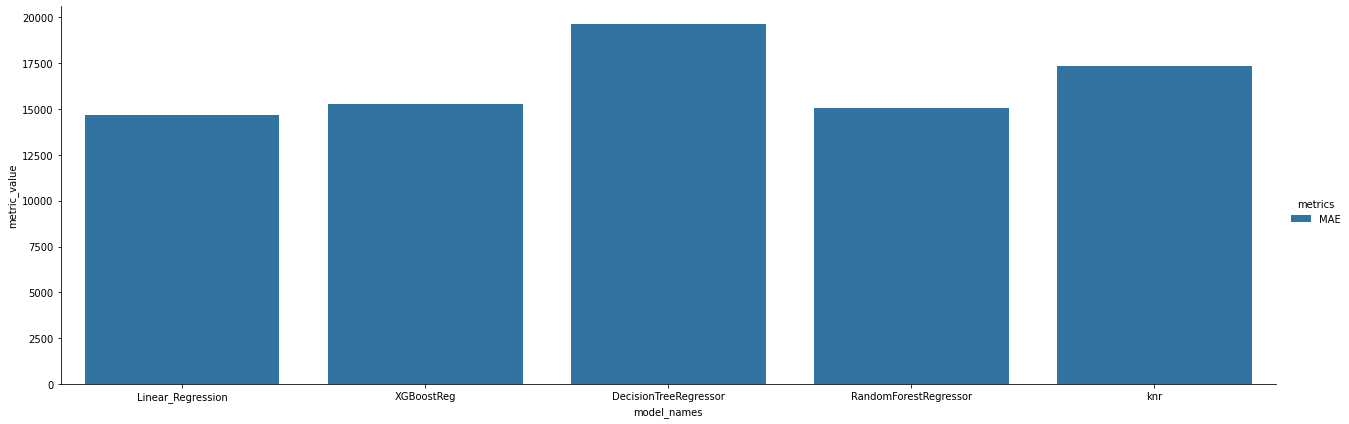

In [ ]:
sns.factorplot(x='model_names', y='metric_value', hue='metrics', data=df_metrics_melt, kind='bar', size=6, aspect=3)

### Prediction on Test Dataset

In [ ]:
df_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks Datasets/ML Group Assignment 4/CensusCanada2016Test.csv')

In [ ]:
df_test.head()

,Total Population,Total Households,Total Households For Period Of Construction,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Total Households for Tenure,Dwellings by Tenure Owner,Dwellings by Tenure Renter
0,2692,893,893,15,21,46,648,114,883,10,0,836,790,46
1,3884,1511,1511,17,839,218,27,33,1025,486,0,1399,1207,192
2,7014,2768,2768,767,615,223,435,166,1390,1378,0,2552,1533,1019
3,9136,4577,4577,1540,969,437,244,457,2102,2461,14,4232,2402,1830
4,3614,1167,1167,44,94,34,115,184,1069,98,0,1080,1042,38


In [ ]:
df_test = df_test.drop(['Total Households For Period Of Construction',
               'Total Households for Tenure'], axis=1)

In [ ]:
# Normalizing the Test Dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_test_scaled = scaler.fit_transform(df_test)

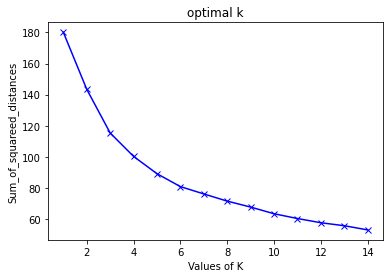

In [ ]:
# Clustering on Test Dataset
from sklearn.cluster import KMeans
Sum_of_squareed_distances = []
K = range(1,15)
for num_clusters in K:
    kmeans = KMeans(n_clusters = num_clusters)
    kmeans.fit(df_test_scaled)
    Sum_of_squareed_distances.append(kmeans.inertia_)
    
plt.figure    
plt.plot(K,Sum_of_squareed_distances, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum_of_squareed_distances')   
plt.title('optimal k') 
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(df_test_scaled)
y_kmeans_df_test_scaled = kmeans.predict(df_test_scaled)

In [ ]:
test_set_predictions = RandomForestRegressors.predict(df_test_scaled)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
test_set_predictions

array([ 99732.89375,  85982.75525,  58055.1015 ,  59945.26575,
        95877.7125 ,  63216.831  ,  88764.37575,  68208.802  ,
       127658.7565 ,  87283.68475,  79028.39275, 125521.07175,
        97868.33975,  96292.581  ,  98847.29175, 121179.567  ,
        62554.89975, 107577.245  ,  87721.44025,  65260.885  ,
       115447.73725,  62172.36025,  60030.087  ,  76934.22825,
        96461.7195 , 115447.73725,  76971.00475, 115447.73725,
        97252.6845 , 115447.73725,  96758.9025 ,  53942.73175,
        50535.41675,  52869.3125 ,  59964.99675, 115001.6755 ,
       140207.1575 , 110439.3955 , 109581.60575,  72754.70225,
        84019.813  , 140492.123  , 105425.56625,  59966.21025,
        62130.1975 ,  90929.393  ,  50756.413  ,  54976.41825,
        51319.24525,  49337.5175 ,  90805.25125,  62271.80225,
        89994.5045 ,  89885.0925 ,  50639.29575,  52387.57175,
        74290.24175,  54039.59175,  95773.0475 ,  58605.51925,
       102689.23275,  60120.61275,  88268.24525, 102149

In [ ]:
#build K means clustering model
kmean_t = KMeans(n_clusters = 6)
kmean_t.fit(df_test)
y_predct = kmean_t.predict(df_test)


#save the prediced result as text file    
lines = []

for pred in y_predct:
    lines.append(str(pred))

with open('Teampredictions.txt', 'w') as f:
    f.write('\n'.join(lines))    

### g. Among the tools we have discussed in class, you may choose whatever appropriate estimation modeling tools you wish, in order to construct the best possible predictions. Make sure you make appropriate use of the training and validation samples to evaluate performance.

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np


print('Evaluation for K =6: ' +str(kmean.inertia_))

Evaluation for K =6: 10743338362.893131


### h. Select your two or three best models, compare them (perhaps using a table), and recommend the one  which you think is the best

Evaluation for K =7: 9551448856.460312


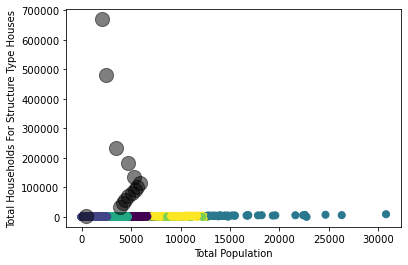

In [ ]:
#build K means clustering
kmean2 = KMeans(n_clusters = 7)
kmean2.fit(df1)
y_kmeans2 = kmean2.predict(df1)

#plot scatter 
plt.scatter(df1['Total Population'], df1['Total Households For Structure Type Houses'], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel('Total Population')
plt.ylabel('Total Households For Structure Type Houses')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

print('Evaluation for K =7: ' +str(kmean2.inertia_))

The model for k = 7 is better than the model for k = 6